In [2]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd ../web-app/

/Users/dorislee/Desktop/Fall2016/Research/seg/crowd-seg/web-app


In [4]:
# Create CSV file from app.db
import csv 
import sqlite3

from glob import glob; from os.path import expanduser
conn = sqlite3.connect(glob(expanduser('app.db'))[0])
table_names = ["bounding_box","image","object","object_location","worker"]
for table_name in table_names : 
    cursor = conn.cursor()
    cursor.execute("select * from {};".format(table_name))
    with open("{}.csv".format(table_name), "wb") as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow([i[0] for i in cursor.description]) # write headers
        csv_writer.writerows(cursor)

In [5]:
import pandas as pd 
import matplotlib.image as mpimg
img_info = pd.read_csv("image.csv")
fname = "app/static/"+img_info["filename"][0]+".png"
img=mpimg.imread(fname)
object_info = pd.read_csv("object.csv")
object_location = pd.read_csv("object_location.csv")
bb_info = pd.read_csv("bounding_box.csv")

In [6]:
object_tbl = object_info.merge(object_location,how="inner",left_on="id",right_on="object_id")
image_info = pd.read_csv("image.csv")

In [7]:
#Open image for computing width and height of image 
from PIL import Image
im = Image.open(fname)

In [10]:
import ast

(481, 0)

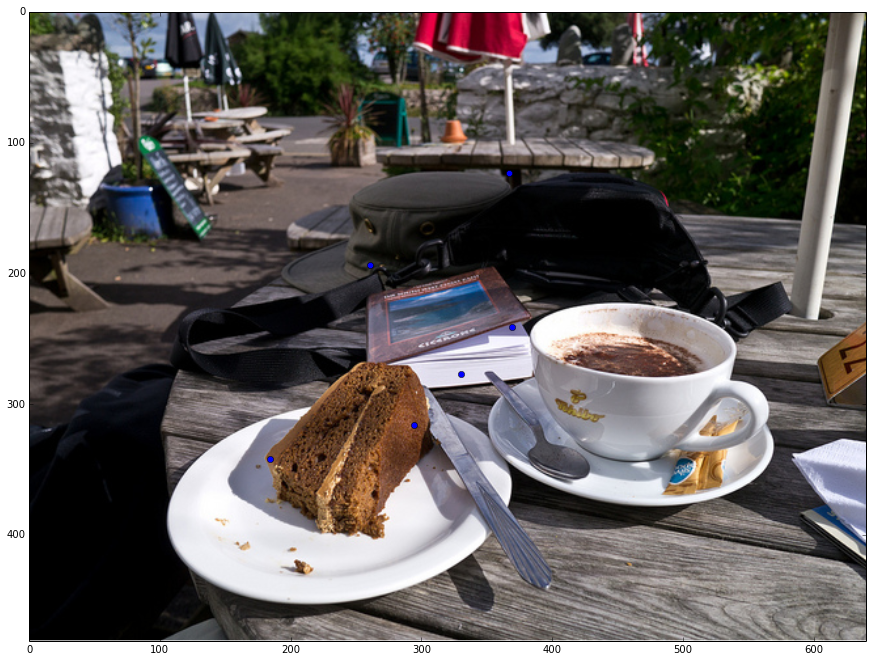

In [11]:
plt.figure(figsize =(15,15))
plt.imshow(img)
width = im.size[0]
height = im.size[1]
plt.plot(width*object_tbl["x_loc"],height*object_tbl["y_loc"],'o')
# for bb_path in zip(bb_info["x_locs"],bb_info["y_locs"]):
#     x_locs = ast.literal_eval(bb_path[0])
#     y_locs = ast.literal_eval(bb_path[1])
#     # Append the starting point again in the end to close the BB
#     x_locs.append(x_locs[0])
#     y_locs.append(y_locs[0])
#     plt.plot(x_locs,y_locs,'-',color="cyan")
plt.xlim(0,width)
plt.ylim(height,0)

In [104]:
#Convert .jpg to .png

In [96]:
cd app/static

/Users/dorislee/Desktop/Fall2016/Research/seg/crowd-seg/web-app/app/static


In [106]:
import glob
import os 

In [108]:
for fname in glob.glob("COCO*"):
    os.system("convert {0} {1}".format(fname, fname.split(".")[0]+".png"))